# **ANALYSE DES VENTES DE LA LIBRAIRIE LAPAGE AVEC PYTHON**

### **MISSION** : Analyser les points forts/faibles, le comportement des clients,etc.

**1ère partie** : **Analyse des différents indicateurs de vente**
1.   Analyse des différents indicateurs et graphiques autour du
chiffre d'affaires
2.   Analyse de l’évolution dans le temps et mettre en place une
décomposition en moyenne mobile pour évaluer la tendance globale
3.   Faire un zoom sur les références, pour voir un peu les tops et les
flops, la répartition par catégorie, etc
4.   Fournir des informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via une courbe de Lorenz
5.   D'autres informations et graphiques qui apporteraient de l’information pertinente


**2ème partie : Analyse ciblée clients**   

L’objectif est de comprendre le comportement des clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via les librairies physiques. 
Analyse:
1.   du lien entre le genre d’un client et les catégories des livres achetés ;
2.   du lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés


# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation des jeux de données</a>
 
**Partie 2 : Analyse des jeux de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes des jeux de données </a>
 - <a href="#C4">Analyse des valeurs manquantes</a>
 - <a href="#C5">Analyse des types de données</a>
 
**Partie 3 : Nettoyage des jeux de données**
 - <a href="#C6">Traitement des valeurs test</a>
 - <a href="#C7">Conversion de types</a>
 - <a href="#C8">Unicité de la clé primaire</a>
 - <a href="#C9">Détection des doublons</a>
 - <a href="#C10">Traitement des valeurs négatives</a> 
  
**Partie 4 : Jointure des dataframes**
 - <a href="#C11">Jointure des 3 tables</a>
 
**Partie 5 : Indicateurs statistiques**
 - <a href="#C12">Distribution des prix</a>
 - <a href="#C13">Analyse du nombre d'achats</a>
 - <a href="#C14">Analyse du CA</a>
 
**Partie 6 : Tests statistiques**
 - <a href="#C15">Sexe client / Catégorie livres achetés</a>
 - <a href="#C16">Classe Age client / Catégorie livres achetés</a>
 - <a href="#C17">Age client / Catégorie livres achetés</a>
 - <a href="#C18">Age client / Montant total des achats/a>
 - <a href="#C19">Age client / Fréquence d'achat</a>
 - <a href="#C20">Age client / Panier moyen</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies </font></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,timedelta 
import datetime as dt
import scipy.stats as st
import io 

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Importation des jeux de données </font></a>

In [154]:
uploaded = files.upload()

Saving customers.csv to customers (1).csv
Saving products.csv to products (1).csv
Saving transactions.csv to transactions (1).csv


In [155]:
df_customers = pd.read_csv(io.BytesIO(uploaded['customers.csv'])) 
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [156]:
df_products = pd.read_csv(io.BytesIO(uploaded['products.csv'])) 
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [157]:
df_transactions = pd.read_csv(io.BytesIO(uploaded['transactions.csv'])) 
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


# **<font color='indianred'>Partie 2 : Analyse des jeux de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes des jeux de données</font></a>

In [158]:
df_customers.info()
print('\n')
df_products.info()
print('\n')
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   sessi

In [159]:
#nombre de lignes et colonnes
print('Table customers',df_customers.shape)
print('Table products',df_products.shape)
print('Table transactions',df_transactions.shape)

Table customers (8623, 3)
Table products (3287, 3)
Table transactions (679532, 4)


## <a name="C4"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [160]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',round((df.isna().sum()*100/df.shape[0]),2).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          round((df.isna().sum()*100/df.shape[0]),2).sort_values(ascending=True))
    print('\n')
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isna(), cbar=False)

1-Table customers :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 25869
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    3
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 client_id    0.0
sex          0.0
birth        0.0
dtype: float64


---------------------------------------
2-Table products :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 9861
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    3
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 id_prod    0.0
price      0.0
categ      0.0
dtype: float64


---------------------------------------
3-Table transactions :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 2718128
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    4
dtype: int64


Pourc

Text(0.5, 1.0, 'Heatmap des valeurs manquantes transactions')

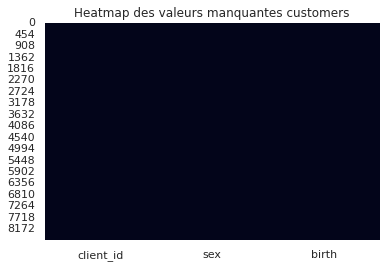

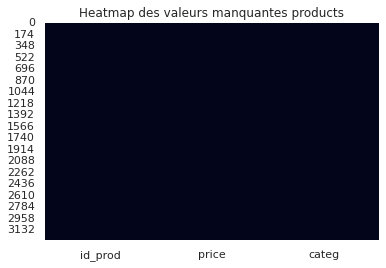

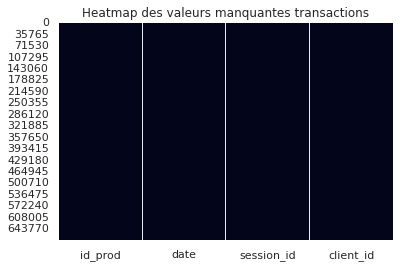

In [161]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 3 jeux de données 
print('1-Table customers :')
val_manq(df_customers)
plt.title("Heatmap des valeurs manquantes customers")
print('---------------------------------------')
print('2-Table products :')
val_manq(df_products)
plt.title("Heatmap des valeurs manquantes products")
print('---------------------------------------')
print('3-Table transactions :')
val_manq(df_transactions)
plt.title("Heatmap des valeurs manquantes transactions")

✅ Analyse des valeurs manquantes : Il n'y a pas de valeurs manquantes dans les tables

## <a name="C5"><font color='LightSeaGreen'>Analyse des types de données</font></a>

In [162]:
#type des variables de la table customers
print(df_customers.dtypes)
print('\n')
#compte le nombre de variables par type
df_customers.dtypes.value_counts()

client_id    object
sex          object
birth         int64
dtype: object




object    2
int64     1
dtype: int64

Table customers : Les types des variables sont conformes aux valeurs.

In [163]:
#type des variables de la table products
print(df_products.dtypes)
print('\n')
#compte le nombre de variables par type
df_products.dtypes.value_counts()

id_prod     object
price      float64
categ        int64
dtype: object




object     1
float64    1
int64      1
dtype: int64

Table products : Les types des variables sont conformes aux valeurs.

In [164]:
#type des variables de la table transactions
print(df_transactions.dtypes)
print('\n')
#compte le nombre de variables par type
df_transactions.dtypes.value_counts()

id_prod       object
date          object
session_id    object
client_id     object
dtype: object




object    4
dtype: int64

Table transactions : Toutes les variables sont des chaines de caractères exceptée la variable date qui doit être convertie au format date (voir Partie 3).

# **<font color='indianred'>Partie 3 : Nettoyage des jeux de données</font>**

## <a name="C6"><font color='LightSeaGreen'>Traitement des valeurs test</font></a>

Il y a des valeurs "test" sous forme de chaines de caractères qu'il faut traiter.

✅ Traitement des lignes "test"

In [165]:
#trouver les lignes contenant la chaine de caractères "test" dans la colonne date
df_trans_test=df_transactions.query("date.str.contains('test')", engine="python")
df_trans_test          

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [166]:
#copie du df transactions
dft=df_transactions.copy()
dft.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [167]:
#suppression des lignes contenant la chaine 'test_' dans dft
dft=dft.drop(dft.query("date.str.contains('test_')",engine="python").index)
dft

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [168]:
#demande si les lignes 'test_' est toujours présente dans la colonne 'date' 
dft.query("date.str.contains('test_')",engine="python")['date']

Series([], Name: date, dtype: object)

La liste est vide car le dataframe transactions ne contient plus de lignes 'test_'. On peut procéder à la conversion des dates en format date.

## <a name="C7"><font color='LightSeaGreen'>Conversion de types</font></a>

In [169]:
#conversion en format datetime de la colonne date
dft['date']=pd.to_datetime(dft['date'])

In [170]:
#Affiche le type de date en tant que datetime64[ns]
dft.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

## <a name="C8"><font color='LightSeaGreen'>Unicité de la clé primaire</font></a>

In [171]:
#Creation d'une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable', col, 'n\'est pas une clé primaire')

In [172]:
cle_primaire(df_customers,'client_id')
cle_primaire(df_products,'id_prod')
cle_primaire(dft,'session_id')
cle_primaire(dft,'date')

La variable client_id est une clé primaire
La variable id_prod est une clé primaire
La variable session_id n'est pas une clé primaire
La variable date est une clé primaire


Dans le tableau "transactions", les variables client_id et id_prod sont des clés étrangères.

## <a name="C9"><font color='LightSeaGreen'>Détection des doublons</font></a>

In [173]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [174]:
print('------------------') 
print('Table customers')
detect_doublons(df_customers)
print('------------------') 
print('Table products')
detect_doublons(df_products)
print('------------------') 
print('Table transactions')
detect_doublons(dft)

------------------
Table customers
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


------------------
Table products
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


------------------
Table transactions
------------------
La table contient 0 doublons.
(0, 4)


Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []




Il n'y a pas de doublons.

## <a name="C10"><font color='LightSeaGreen'>Traitement des valeurs négatives</font></a>

In [175]:
#récupère la ligne où le prix est négatif 
df_prod_negatif=df_products[df_products['price']<0].index
df_prod_negatif

Int64Index([731], dtype='int64')

In [176]:
#supprime la ligne où le prix est négatif dans df_products
df_products=df_products.drop(df_prod_negatif)

In [177]:
df_products[df_products['price']<0]

,id_prod,price,categ


Il n'y a plus de valeurs négatives.

# **<font color='indianred'>Partie 4 : Jointure des dataframes</font>**

## <a name="C11"><font color='LightSeaGreen'>Jointure des 3 tables</font></a>

#### <font color='purple'>1ere jointure entre products and transactions</font>

In [178]:
#Jointure externe complète entre df_products et df_transactions
df_protrans=pd.merge(df_products, dft, left_on='id_prod', right_on='id_prod', how='outer', indicator=True)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


#### <font color='purple'>Produit 0_2245 non référencé dans le df_products : Imputation pour la catégorie et le prix</font>

In [179]:
#affiche les produits existants dans le df transactions (vendus) mais pas dans le df_products (non-référencé)
df_protrans[df_protrans['_merge']=='right_only']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


Le produit de référence 0_2245 a été vendu 221 fois sans qu'il ne soit référencé dans la table products. Ce produit fait partie de la catégorie 0 car le premier chiffre des codes produits font référence à sa categorie.
Je vais donc remplacer les nan de la colonne catégorie par 0 pour le produit 0_2245.
Pour la colonne price, je vais imputer par la moyenne / la médiane. Je vais d'abord analyser la distribution de la variable price (symetrique/asymétrique) pour choisir entre la moyenne et la mediane. Si elles sont differentes (distribution non gaussienne), alors j'utiliserai la mediane. 

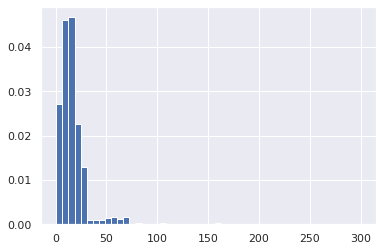

In [180]:
#Création de la courbe sur la variable price
df_protrans['price'].hist(density=True, bins=50)

Il y a une asymétrie dans la distribution sur price, j'utilise donc l'imputation par la médiane.

In [181]:
 #Calcul de la médiane sur la variable price pour les produits de la catégorie 0 qui est la catégorie du produit 0_2245
median0=df_protrans[(df_protrans['categ']==0)]['price'].median()
print('La médiane sur la variable price pour les produits de la catégorie 0 est égale à :', median0)

La médiane sur la variable price pour les produits de la catégorie 0 est égale à : 9.99


In [208]:
#Je remplace les valeurs nulles du prix du produit 0_2245 par la médiane 
df_protrans['price'].fillna(value=median0, inplace=True)
#Je remplace les valeurs nulles de categ par 0 pour le produit 0_2245
df_protrans['categ'].fillna(0, inplace=True)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,9.99,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,9.99,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,9.99,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,9.99,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


#### <font color='purple'>Produits non vendus</font>

In [209]:
#affiche les produits non vendus
df_prod_nonvendus=df_protrans[df_protrans['_merge']=='left_only']
df_prod_nonvendus

,id_prod,price,categ,date,session_id,client_id,_merge


21 produits n'ont pas ete vendus.

In [210]:
#suppression des 21 produits non vendus car ils ne sont pas nombreux
df_protrans=df_protrans.drop(df_protrans[df_protrans['_merge']=='left_only'].index)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,9.99,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,9.99,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,9.99,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,9.99,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [211]:
#Il était aussi possible de faire la jointure à gauche mais le produit 0_2245 et les produits non vendus 
#n'auraient pas été mis en avant 
dff=pd.merge(df_products, dft, on='id_prod', how='left')
dff.isnull().sum()
print(dff[dff['price'].isnull()])
dff[dff['id_prod']=='0_2245']

Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id]
Index: []


,id_prod,price,categ,date,session_id,client_id


#### <font color='purple'>2eme jointure avec customers</font>

In [212]:
#jointure externe complete avec la table customers sur client_id
df_transcl=pd.merge(df_protrans, df_customers, left_on='client_id', right_on='client_id', how='outer')
df_transcl

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991
...,...,...,...,...,...,...,...,...,...
679350,NaN,NaN,NaN,NaT,NaN,c_7584,NaN,f,1960
679351,NaN,NaN,NaN,NaT,NaN,c_90,NaN,m,2001
679352,NaN,NaN,NaN,NaT,NaN,c_587,NaN,m,1993
679353,NaN,NaN,NaN,NaT,NaN,ct_1,NaN,m,2001


#### <font color='purple'>Clients qui n'ont pas fait d'achats</font>

In [213]:
#df des clients qui n'ont pas fait d'achats
df_clients_passifs=df_transcl[(df_transcl['id_prod'].isnull())&(df_transcl['session_id'].isnull())]
df_clients_passifs

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
679332,NaN,NaN,NaN,NaT,NaN,c_8253,NaN,f,2001
679333,NaN,NaN,NaN,NaT,NaN,c_3789,NaN,f,1997
679334,NaN,NaN,NaN,NaT,NaN,c_4406,NaN,f,1998
679335,NaN,NaN,NaN,NaT,NaN,ct_0,NaN,f,2001
679336,NaN,NaN,NaN,NaT,NaN,c_2706,NaN,f,1967
679337,NaN,NaN,NaN,NaT,NaN,c_3443,NaN,m,1959
679338,NaN,NaN,NaN,NaT,NaN,c_4447,NaN,m,1956
679339,NaN,NaN,NaN,NaT,NaN,c_3017,NaN,f,1992
679340,NaN,NaN,NaN,NaT,NaN,c_4086,NaN,f,1992
679341,NaN,NaN,NaN,NaT,NaN,c_6930,NaN,m,2004


Le df_clients_passifs contient les 23 clients qui n'ont pas fait d'achats.

In [214]:
#Je supprime les 23 clients qui n'ont pas fait d'achats du df transcl. car ils ne sont pas nombreux
df_transcl=df_transcl.drop((df_transcl[(df_transcl['id_prod'].isnull())&
                                       (df_transcl['session_id'].isnull())]).index)
df_transcl

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991
...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,both,m,1997
679328,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,both,m,2002
679329,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,both,m,2002
679330,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,both,m,2002


In [215]:
#Nombre de valeurs nulles dans la table protrans
df_transcl.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
_merge        0
sex           0
birth         0
dtype: int64

In [216]:
#la jointure a changé le type de "birth" et "categ" en float
#j'ai converti en integer
df_transcl['birth']=df_transcl['birth'].values.astype(np.int64)
df_transcl['categ']=df_transcl['categ'].values.astype(np.int64)
df_transcl.pop('_merge')
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [217]:
#Ici la jointure à gauche nous évite d'avoir à supprimer les clients qui n'ont pas fait d'achats
#car la jointure ne se serait pas faite sur des lignes où il n'y a pas de référence produits
dfff=pd.merge(df_protrans, df_customers, on='client_id', how='left')
dfff.isnull().sum()
(dfff[dfff['date'].isnull()])
dfff.head()

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both,m,1973
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both,f,1967
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both,m,1984
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both,m,1972


In [218]:
dfff.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
_merge        0
sex           0
birth         0
dtype: int64

In [219]:
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


# **<font color='indianred'>Partie 5 : Indicateurs statistiques </font>**

#### <font color='purple'>Ajout de colonnes time, year, month, day, age et tranches d'age</font>

In [220]:
#Extraction de la date, de l'heure(+minutes+secondes), de l'année, du mois et du jour
df_transcl['year']=df_transcl['date'].dt.year
df_transcl['month']=df_transcl['date'].dt.month
df_transcl['day']=df_transcl['date'].dt.day
#Date courante
date = date.today()
#Calcul et ajout de la colonne age 
df_transcl['age']=date.year-df_transcl['birth'].astype(int)
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,year,month,day,age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,2,20,31
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,31
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,9,31
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,4,28,31
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,7,15,31


In [221]:
# Tranches d'âge
df_transcl['classe_age'] = '18-30'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=30].index] = '30-40'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=40].index] = '40-50'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=50].index] = '50-60'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=60].index] = '60-70'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=70].index] = '70-80'
df_transcl['classe_age'].loc[df_transcl[df_transcl['age']>=80].index] = '80 +'
df_transcl.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id_prod,price,categ,date,session_id,client_id,sex,birth,year,month,day,age,classe_age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,2,20,31,30-40
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,31,30-40
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,9,31,30-40
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,4,28,31,30-40
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,7,15,31,30-40


In [222]:
df_transcl.dtypes

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
year                   int64
month                  int64
day                    int64
age                    int64
classe_age            object
dtype: object

## <a name="C12"><font color='LightSeaGreen'>Distribution des prix</font></a> 

In [223]:
#Résumé statistique de la variable price
df_transcl[['price']].describe(include='all')

,price
count,679332.000000
mean,17.452345
std,18.326510
min,0.620000
25%,8.870000
50%,13.990000
75%,18.990000
max,300.000000


#### <font color='purple'>Distribution de la variable price</font>

In [224]:
#compte le nombre de valeurs uniques sur le prix
len((df_transcl['price']).value_counts().unique())

574

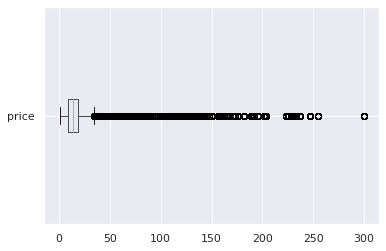

In [225]:
#Visualisation de la distribution de la variable price avec la boite à moustaches avec Matplotlib
df_transcl.boxplot(column='price', vert=False)

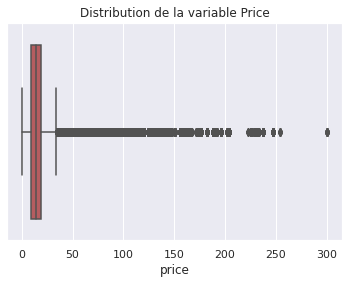

In [226]:
#utilisation de la librairie Seaborn pour representer la variable price sous forme de boxplot
sns.set(style="darkgrid")
sns.boxplot(x=df_transcl["price"], color="r")
plt.title('Distribution de la variable Price')
plt.savefig("distribution_price_boxplot.png")
plt.show()

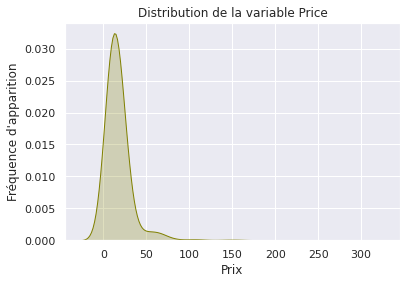

In [227]:
#distribution de la variable price sous forme de courbe
sns.set(style="darkgrid")
sns.kdeplot(df_transcl['price'], shade=True, bw_method=0.5, color="olive")
plt.title('Distribution de la variable Price')
plt.xlabel('Prix')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_price.png")
plt.show()


Il y a des valeurs extremes ne représentant pas des valeurs aberrantes. Ce sont des produits extrêmement chers.

#### <font color='purple'>Répartition des prix par catégorie </font>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


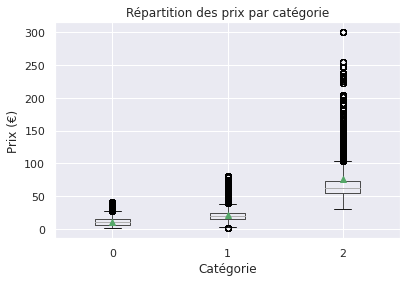

In [228]:
#Affiche avec matplotlib la répartition des prix par catégorie 
#showmeans affiche les valeurs moyennes en vert
#get_figure supprime le titre donné par pandas
df_transcl_boxplot=df_transcl.boxplot(column='price', by='categ', showmeans=True).get_figure().suptitle('')
plt.title('Répartition des prix par catégorie')
plt.xlabel("Catégorie")
plt.ylabel("Prix (€)")
plt.savefig("repartition_px_categ_mat.png")

Les moyennes sont proches de leurs médianes pour les catégories 0 et 1.




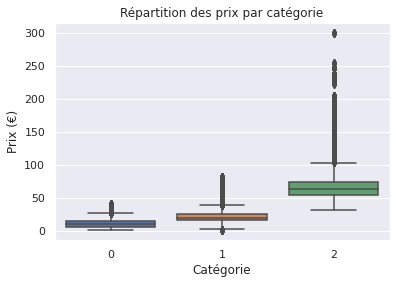

In [229]:
#Boxplot des prix par catégorie avec Seaborn
sns.boxplot(x='categ', y ='price', data =df_transcl).set_title('Répartition des prix par catégorie')
plt.xlabel("Catégorie")
plt.ylabel("Prix (€)")
plt.savefig("repartition_px_categ_seaborn.png")

Il y a asymétrie dans la distribution de la variable Price pour les 3 catégories avec des produits très chers dans la catégorie 2.

In [230]:
#Skewness empirique: mesure l'asymétrie de la distribution de Price par catégorie 
df_prix_cat_skew=df_transcl[['categ', 'price']].groupby('categ', as_index=False).skew()
df_prix_cat_skew=df_prix_cat_skew.rename(columns={'price':'skew'})
df_prix_cat_skew

,categ,skew
0,0,0.422681
1,1,1.734237
2,2,2.183517


Confirmation de l'asymetrie de la distribution de Price pour les 3 catégories. En effet, leurs skewness empiriques sont positifs donc la distribution est étalée à droite. Le skewness de la catégorie 0 est le plus proche de 0 donc la distribution est "faiblement" asymétrique. 

## <a name="C13"><font color='LightSeaGreen'>Analyse du nombre d’achats</font></a>


#### <font color='purple'>Repartition du nombre d'achats par catégorie </font>

In [231]:
#Nombre d'achats par catégorie 
df_prix_cat=df_transcl[['categ', 'price']].groupby('categ', as_index=False).count()
df_prix_cat=df_prix_cat.rename(columns={'price':'effectif'})
df_prix_cat

,categ,effectif
0,0,415680
1,1,227169
2,2,36483


In [232]:
#Calcul de la fréquence d'achats par catégorie 
df_prix_cat['frequence']=df_prix_cat['effectif']/(sum(df_prix_cat['effectif']))
df_prix_cat

,categ,effectif,frequence
0,0,415680,0.611895
1,1,227169,0.334401
2,2,36483,0.053704


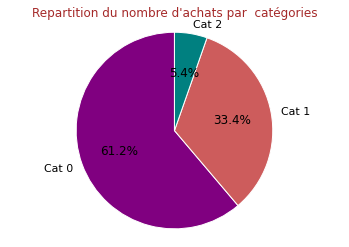

In [233]:
#Diagramme circulaire representant la repartition du nombre d'achats par catégorie 
#liste de couleurs attribuees au diagramme
colors = ['purple', 'indianred', 'teal']
labels = 'Cat 0', 'Cat 1', 'Cat 2'
#donne le titre du diagramme
plt.title('Repartition du nombre d\'achats par  catégories', color='brown')

#création du diagramme circulaire
a, b, c = plt.pie(df_prix_cat['frequence'], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

#trace les axes de facon orthonorme 
plt.axis('equal')

#couleurs des labels
for text in b:
    text.set_color('black')
    
#couleurs des valeurs
for autotext in c:
    autotext.set_color('black')
plt.savefig("repartition_categories.png")
plt.show()

Les produits les plus achetés sont ceux de la catégorie 0.

#### <font color='purple'>Nombre d'achats par client</font>

In [234]:
#création du df des clients et le nombre de leurs achats
df_clients_achats=df_transcl[['client_id', 'session_id']].groupby(['client_id'], as_index=False).count()
df_clients_achats=df_clients_achats.rename(columns={'session_id':'nb_achats'})
df_clients_achats.head()

,client_id,nb_achats
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102


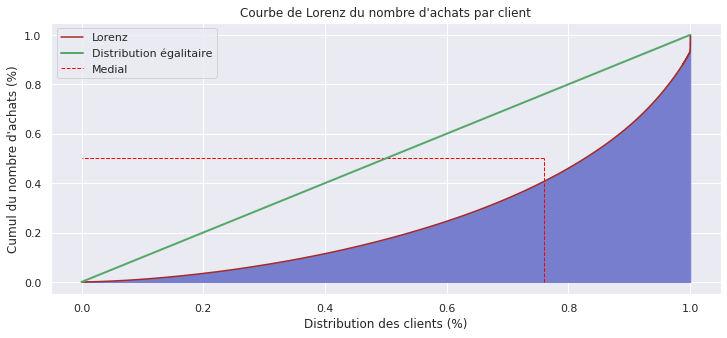

Coefficient de Gini= 0.5


In [235]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle nb_achat_client
plt.figure(figsize=(12, 5))
nb_achat_client = df_clients_achats['nb_achats'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_nb_achat_client = np.cumsum(np.sort(nb_achat_client)) / nb_achat_client.sum()

plt.plot(np.linspace(0,1,len(lorenz_nb_achat_client)), lorenz_nb_achat_client, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_nb_achat_client)) ,lorenz_nb_achat_client , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du nombre d\'achats par client')
plt.xlabel("Distribution des clients (%)")
plt.ylabel("Cumul du nombre d'achats (%)")
plt.legend(loc="best")

plt.savefig("lorenz_nb_achat_client.png")
plt.show()

#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_nb_achat=(lorenz_nb_achat_client.sum()-(lorenz_nb_achat_client[-1]/2)-(lorenz_nb_achat_client[0]/2))/(len(lorenz_nb_achat_client))
S_nb_achat=0.5-aire_nb_achat
gini_nb_achat=2*S_nb_achat
print('Coefficient de Gini=', round(gini_nb_achat,2))

20% des clients font 50% du nombre d'achats.

In [236]:
#liste des 4 premiers clients dont la frequence d'achats est la plus grande
df_clients_achats.sort_values('nb_achats', ascending=False).head(4)

,client_id,nb_achats
677,c_1609,25488
6337,c_6714,9187
2724,c_3454,6773
4388,c_4958,5195


## <a name="C14"><font color='LightSeaGreen'>Analyse du CA</font></a>

#### <font color='purple'>Evolution du CA dans le temps</font>

In [237]:
#Series temporelles avec DatetimeIndex, création de date, sans l'heure, qui devient l'index
df_transcl = (df_transcl.set_index(pd.DatetimeIndex(df_transcl['date'].dt.date)))
df_transcl=df_transcl.rename(columns={'date':'date_time'})
df_transcl.head()

,id_prod,price,categ,date_time,session_id,client_id,sex,birth,year,month,day,age,classe_age
date,,,,,,,,,,,,,
2022-02-20,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,2,20,31,30-40
2022-10-20,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,31,30-40
2021-10-09,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,9,31,30-40
2021-04-28,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,4,28,31,30-40
2021-07-15,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,7,15,31,30-40


In [238]:
#Mettre un index par défaut au lieu de date
df_transcl=df_transcl.reset_index()
df_transcl.head()

,date,id_prod,price,categ,date_time,session_id,client_id,sex,birth,year,month,day,age,classe_age
0,2022-02-20,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,2,20,31,30-40
1,2022-10-20,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,31,30-40
2,2021-10-09,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,9,31,30-40
3,2021-04-28,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,4,28,31,30-40
4,2021-07-15,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,7,15,31,30-40


In [239]:
#regroupement et somme des prix (CA) pour chaque mois entier 
df_ca_mois=(df_transcl[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum())
df_ca_mois=df_ca_mois.rename(columns={'price':'ca'})
df_ca_mois.head()

,ca
date,
2021-03-31,482530.52
2021-04-30,476249.16
2021-05-31,493023.39
2021-06-30,484158.49
2021-07-31,482875.36


In [240]:
#CA total
ca_total=sum(df_ca_mois['ca'])
round(ca_total,0)

11855936.0

Le chiffre d'affaires total est approximativement égal à 11.8 millions.

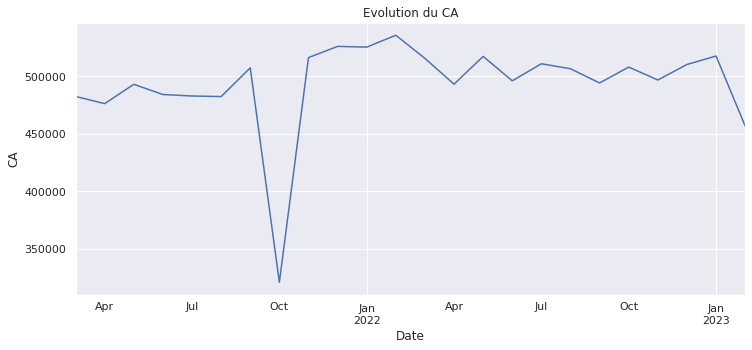

In [241]:
#visualisation du CA dans le temps de mars 2021 à février 2023
df_ca_mois['ca'].plot(figsize=(12,5))
plt.title('Evolution du CA')
plt.xlabel('Date')
plt.ylabel('CA')
plt.savefig("evolution_ca.png")
plt.show()

Nous observons une chute du CA en Octobre 2021 jusqu'à 320868.67€.

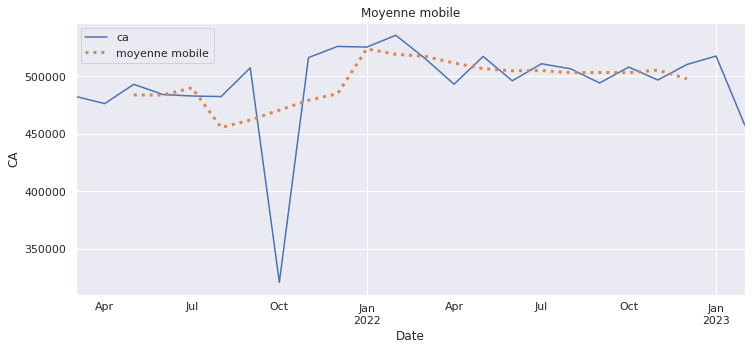

In [242]:
#Lissage des valeurs avec la Moyenne mobile sur les 5 premiers mois 
plt.figure(figsize=(12, 5))
df_ca_mois['ca'].plot(label='ca')
df_ca_mois['ca'].rolling(window=5, center=True).mean().plot(label='moyenne mobile', lw=3, ls=':', alpha=1)
plt.title('Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('CA')
plt.legend()
plt.show()

In [243]:
#Nombre de transactions faites en Octobre 2021
len(df_transcl[(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])

21606

In [244]:
#Nombre de transactions faites en Septembre 2021
len(df_transcl[(df_transcl['date']>='2021-09-01')&(df_transcl['date']<='2021-09-30')])

33326

Il y a une grande différence entre le nombre de transactions d'octobre et de septembre, il semblerait qu'il y ait une anomalie dans les données. 

In [245]:
#Calcul du CA par mois pour la catégorie 0 
df_transcl0=df_transcl[df_transcl['categ']==0]
df_ca_mois0=df_transcl0[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois0=df_ca_mois0.rename(columns={'price':'ca_cat0'})
df_ca_mois0.head(5)

,ca_cat0
date,
2021-03-31,193719.08
2021-04-30,205362.32
2021-05-31,196266.64
2021-06-30,168013.08
2021-07-31,144790.75


In [246]:
#Calcul du CA par mois pour la catégorie 1
df_transcl1=df_transcl[df_transcl['categ']==1]
df_ca_mois1=df_transcl1[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois1=df_ca_mois1.rename(columns={'price':'ca_cat1'})
df_ca_mois1

,ca_cat1
date,
2021-03-31,186974.17
2021-04-30,156138.35
2021-05-31,165893.40
2021-06-30,189162.04
2021-07-31,188523.27
2021-08-31,162991.38
2021-09-30,190613.78
2021-10-31,33762.32
2021-11-30,252910.39


Nous observons une baisse du CA des produits de la catégorie 1 pour le mois d'octobre 2021 (33762.32€) en comparaison avec les chiffres des autres mois

In [247]:
#Calcul du CA par mois pour la catégorie 2
df_transcl2=df_transcl[df_transcl['categ']==2]
df_ca_mois2=df_transcl2[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois2=df_ca_mois2.rename(columns={'price':'ca_cat2'})
df_ca_mois2.head()

,ca_cat2
date,
2021-03-31,101837.27
2021-04-30,114748.49
2021-05-31,130863.35
2021-06-30,126983.37
2021-07-31,149561.34


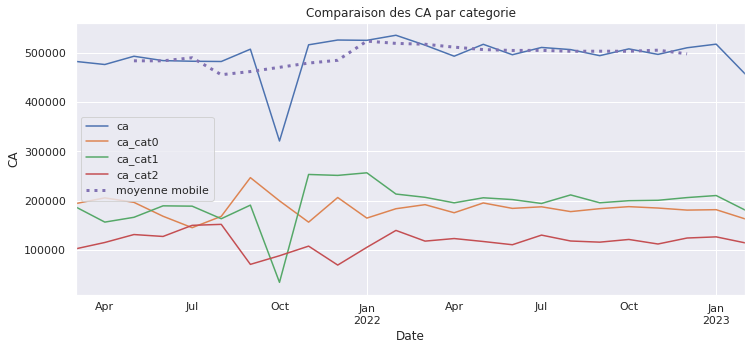

In [248]:
#Comparaison du CA par catégorie 
plt.figure(figsize=(12, 5))
df_ca_mois['ca'].plot(label='ca')
df_ca_mois0['ca_cat0'].plot(label='ca_cat0')
df_ca_mois1['ca_cat1'].plot(label='ca_cat1')
df_ca_mois2['ca_cat2'].plot(label='ca_cat2')
df_ca_mois['ca'].rolling(window=5, center=True).mean().plot(label='moyenne mobile', lw=3, ls=':', alpha=1)
plt.title('Comparaison des CA par categorie')
plt.xlabel('Date')
plt.ylabel('CA')
plt.legend()
plt.savefig("evolution_ca_cat_moy_mob.png")
plt.show()

Nous observons que la chute du CA se situe dans la catégorie 1.

In [249]:
#CA du mois d'octobre pour les produits de catégorie 0
df_ca_cat0_oct=df_transcl[(df_transcl['categ']==0)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')]
df_ca_cat0_oct=df_ca_cat0_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat0_oct=df_ca_cat0_oct.rename(columns={'price':'ca_cat0'})
df_ca_cat0_oct.head()

,ca_cat0
date,
2021-10-01,6950.50
2021-10-02,7141.01
2021-10-03,6786.57
2021-10-04,6553.58
2021-10-05,6357.91


In [250]:
#CA du mois d'octobre pour les produits de catégorie 1
df_ca_cat1_oct=(df_transcl[(df_transcl['categ']==1)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])
df_ca_cat1_oct=df_ca_cat1_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat1_oct=df_ca_cat1_oct.rename(columns={'price':'ca_cat1'})
df_ca_cat1_oct.head()

,ca_cat1
date,
2021-10-01,7003.79
2021-10-02,0.00
2021-10-03,0.00
2021-10-04,0.00
2021-10-05,0.00


Il n'y a pas de ventes entre le 2 et le 27 Octobre 2021 pour les produits de la catégorie 1.

In [251]:
#CA du mois d'octobre pour les produits de catégorie 2
df_ca_cat2_oct=(df_transcl[(df_transcl['categ']==2)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])
df_ca_cat2_oct=df_ca_cat2_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat2_oct=df_ca_cat2_oct.rename(columns={'price':'ca_cat2'})
df_ca_cat2_oct.head()

,ca_cat2
date,
2021-10-01,3104.05
2021-10-02,2041.12
2021-10-03,2206.48
2021-10-04,2746.08
2021-10-05,3032.55


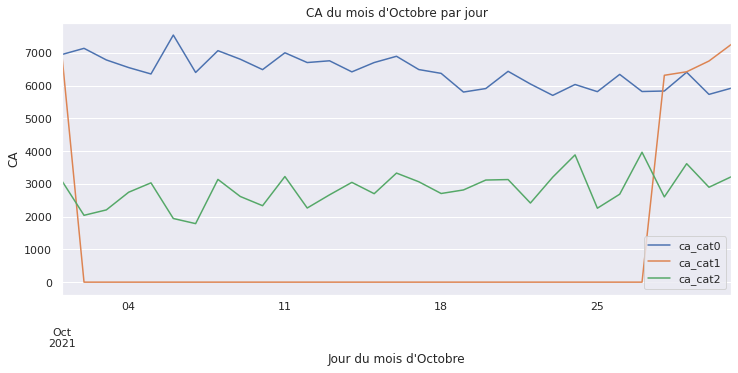

In [252]:
#visualisation du CA du mois d'octobre pour les produits des 3 catégories
plt.figure(figsize=(12, 5))
df_ca_cat0_oct['ca_cat0'].plot(label='ca_cat0')
df_ca_cat1_oct['ca_cat1'].plot(label='ca_cat1')
df_ca_cat2_oct['ca_cat2'].plot(label='ca_cat2')
plt.title('CA du mois d\'Octobre par jour')
plt.xlabel('Jour du mois d\'Octobre')
plt.ylabel('CA')
plt.legend()
plt.savefig("ca_oct_par_jour.png")
plt.show()

Comme nous pouvons le voir sur le graphique, nous n'avons pas de ventes du 2 au 27 octobre 2021. Je suppose qu'il y a eu un oubli ou une erreur de saisie dans les ventes d'Octobre. 

In [253]:
#Imputation du CA des produits de la catégorie 1 par la moyenne du CA de mars 2021 a fevrier 2023 
#des produits de la catégorie 1 sans compter le mois d'octobre 
moy1=round((df_ca_mois1[(df_ca_mois1.index!='2021-10-31')]['ca_cat1']).mean(),2)
ca_cat1_oct=df_ca_mois1['ca_cat1']['2021-10-31']
df_ca_mois1=df_ca_mois1.replace(ca_cat1_oct, moy1)
df_ca_mois1

,ca_cat1
date,
2021-03-31,186974.17
2021-04-30,156138.35
2021-05-31,165893.40
2021-06-30,189162.04
2021-07-31,188523.27
2021-08-31,162991.38
2021-09-30,190613.78
2021-10-31,200867.84
2021-11-30,252910.39


#### <font color='purple'>CA par catégorie</font>

In [254]:
df_ca_cat=df_transcl[['categ', 'price']].groupby('categ', as_index=False).sum()
df_ca_cat=df_ca_cat.rename(columns={'price':'ca'})
df_ca_cat

,categ,ca
0,0,4421938.76
1,1,4653722.69
2,2,2780275.02


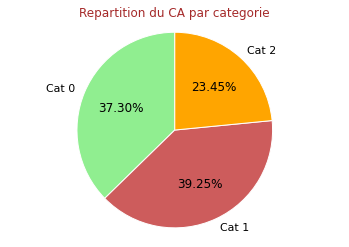

In [255]:
#Diagramme circulaire representant la repartition des catégories 
#liste de couleurs attribuees au diagramme
colors = ['lightgreen', 'indianred', 'orange']
labels = 'Cat 0', 'Cat 1', 'Cat 2'
#donne le titre du diagramme
plt.title('Repartition du CA par categorie', color='brown')

#création du diagramme circulaire
a, b, c = plt.pie(df_ca_cat['ca'], labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)

#trace les axes de facon orthonorme 
plt.axis('equal')

#couleurs des labels
for text in b:
    text.set_color('black')
    
#couleurs des valeurs
for autotext in c:
    autotext.set_color('black')

plt.savefig("repartition_ca.png")
plt.show()

Les produits de la catégorie 1 rapportent le plus grand CA malgré le "trou" dans les ventes d'octobre 2021.

#### <font color='purple'>CA par sexe et catégorie</font>

In [256]:
#Dataframe du CA total par sexe 
df_ca_sex=df_transcl[['price', 'sex', 'categ']].groupby(['sex', 'categ'], as_index=False).sum()
df_ca_sex=df_ca_sex.rename(columns={'price':'ca'})
df_ca_sex

,sex,categ,ca
0,f,0,2191181.90
1,f,1,2358417.02
2,f,2,1311253.04
3,m,0,2230756.86
4,m,1,2295305.67
5,m,2,1469021.98


In [257]:
df_pivot=df_ca_sex.pivot_table(index='sex', columns='categ', values='ca', aggfunc=sum).reset_index()
df_pivot

categ,sex,0,1,2
0,f,2191181.90,2358417.02,1311253.04
1,m,2230756.86,2295305.67,1469021.98


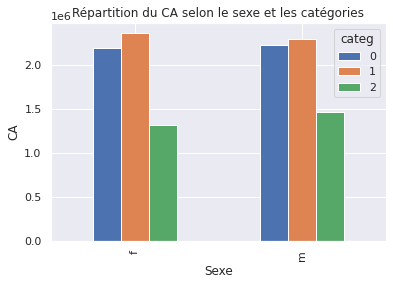

In [258]:
#Diagramme à barres du CA par sexe selon les 3 catégories 
df_pivot_ca_sex=df_pivot.plot(kind='bar', x='sex').set_title('Répartition du CA selon le sexe et les catégories')
#supprime le titre donné par pandas
df_pivot_ca_sex.get_figure().suptitle('')
plt.xlabel('Sexe')
plt.ylabel('CA')
plt.savefig("sex_categ.png")
plt.show()

Il semble que la repartition du CA entre les hommes et les femmes par catégorie est quasiment la même.

#### <font color='purple'>CA par âge et catégorie </font>

In [259]:
#compte les valeurs uniques de la variable age
len((df_transcl['age']).value_counts().unique())

76

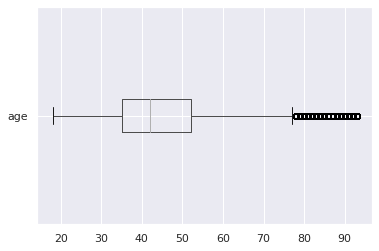

In [260]:
#Distribution de la variable age
df_transcl.boxplot(column='age', vert=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a09c6510>]],
      dtype=object)

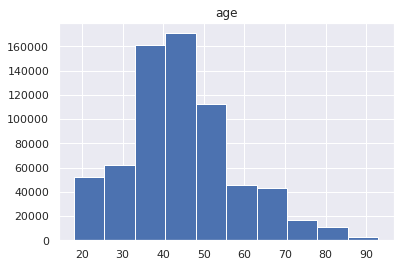

In [261]:
#Distribution de la variable age
df_transcl.hist(column='age')

Le plus grand nombre de clients sont âgés de 40 à 50 ans.


In [262]:
#Dataframe du CA total par âge 
df_ca_age=df_transcl[['age', 'price']].groupby(['age'], as_index=False).sum()
df_ca_age=df_ca_age.rename(columns={'price':'ca'})
df_ca_age.head()

,age,ca
0,18,609013.69
1,19,178195.78
2,20,184207.32
3,21,178497.70
4,22,165027.96


In [263]:
#le plus grand CA
df_ca_age[df_ca_age['age']==42]

,age,ca
24,42,613654.54


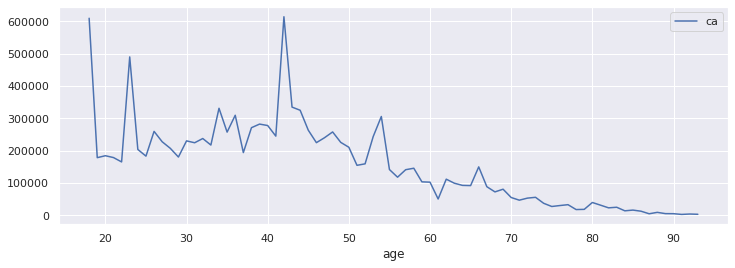

In [264]:
#Visualisation du CA par âge 
df_ca_age.plot(x='age', y="ca", figsize=(12,4))

D'apres les chiffres et le graphique, nous observons 2 pics pour les clients âgés de 18 ans(609013.69€) et 42 ans (613654.54€) qui rapportent un CA superieur a 600k€ et un 3eme pic pour les clients âgés de 23 ans : 489497.54€.


In [265]:
#CA par age/tranche d'âge et catégorie 
df_ca_age_cat=df_transcl[['age', 'classe_age', 'categ', 'price']].groupby(['age','classe_age', 'categ'], as_index=False).sum()
df_ca_age_cat=df_ca_age_cat.rename(columns={'price':'ca'})
df_ca_age_cat

,age,classe_age,categ,ca
0,18,18-30,0,35914.36
1,18,18-30,1,118362.47
2,18,18-30,2,454736.86
3,19,18-30,0,9560.43
4,19,18-30,1,34435.66
...,...,...,...,...
223,92,80 +,1,3074.34
224,92,80 +,2,111.98
225,93,80 +,0,716.76
226,93,80 +,1,2359.10


In [266]:
#Creation d'une table pivot afin de regrouper le CA par catégorie par tranche d'âge 
df_pivot_age=df_ca_age_cat.pivot_table(index='classe_age', columns='categ', values='ca', aggfunc=sum).reset_index()
df_pivot_age

categ,classe_age,0,1,2
0,18-30,164579.93,569709.39,2330568.80
1,30-40,1440328.05,884020.03,228306.46
2,40-50,1844032.72,1089966.27,71562.02
3,50-60,552961.85,1086159.98,83020.23
4,60-70,262172.02,632303.58,45138.66
5,70-80,104907.25,256736.39,13017.35
6,80 +,52956.94,134827.05,8661.50


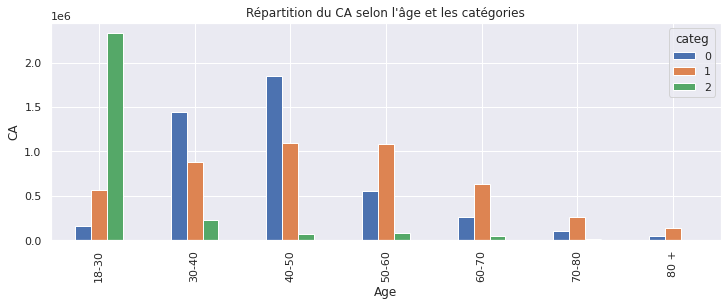

In [267]:
#Diagramme à barres du CA par tranche d'âge selon les 3 catégories 
df_pivot_ca_age=df_pivot_age.plot(kind='bar', x='classe_age',figsize=(12,4)).set_title('Répartition du CA selon l\'âge et les catégories')
#supprime le titre donné par pandas
df_pivot_ca_age.get_figure().suptitle('')
plt.xlabel('Age')
plt.ylabel('CA')
plt.savefig("age_categ.png")
plt.show()

Les clients âgées entre 18-30 ans achetent des produits de la catégorie 2 qui rapportent le plus grand CA alors que les clients âgées entre 30-50 ans achetent des produits de la categorie 0 rapportant un grand CA.

#### <font color='purple'>CA par client</font>

In [268]:
#Client et CA
df_clients_ca=df_transcl[['client_id', 'price']].groupby(['client_id'], as_index=False).sum()
df_clients_ca=df_clients_ca.rename(columns={'price':'ca'})
df_clients_ca

,client_id,ca
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


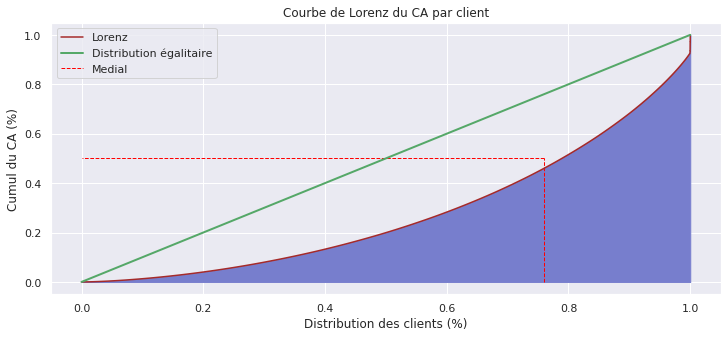

Coefficient de Gini= 0.45


In [269]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle ca_client
ca_client = df_clients_ca['ca'].values
plt.figure(figsize=(12, 5))

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_ca_client = np.cumsum(np.sort(ca_client)) / ca_client.sum()

plt.plot(np.linspace(0,1,len(lorenz_ca_client)), lorenz_ca_client, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ca_client)) ,lorenz_ca_client , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du CA par client')
plt.xlabel("Distribution des clients (%)")
plt.ylabel("Cumul du CA (%)")
plt.legend(loc="best")

plt.savefig("lorenz_ca_client.png")
plt.show()
#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_client=(lorenz_ca_client.sum()-(lorenz_ca_client[-1]/2)-(lorenz_ca_client[0]/2))/(len(lorenz_ca_client))
S_client=0.5-aire_client
gini_client=2*S_client
print('Coefficient de Gini=', round(gini_client,2))

*   La courbe de Lorenz nous affiche une distance assez importante avec la premiere bissectrice.
*   Nous pouvons lire que 20% des clients font 50% du CA total.
*   Le coefficient de Gini (0.45) confirme que la répartition des clients n'est pas égalitaire.





Clients rapportant le plus grand CA

In [270]:
#liste des 4 clients qui rapportent le plus grand CA
df_clients_top=df_clients_ca.sort_values('ca', ascending=False).head(4)
df_clients_top

,client_id,ca
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153658.86
2724,c_3454,113667.90


Clients rapportant le plus petit CA

In [271]:
#liste des 4 clients qui rapportent le plus petit CA
df_clients_ca.sort_values('ca', ascending=True).head(4)

,client_id,ca
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
1556,c_240,11.06


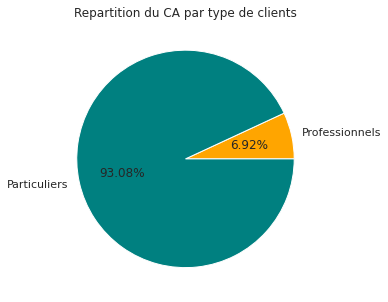

In [272]:
#Diagramme circulaire representant la repartition du CA pr type de clients
plt.figure(figsize=[5,5])
labels = 'Professionnels', 'Particuliers'
plt.pie([df_clients_top.ca.sum(),df_clients_ca.ca.sum()], colors=["orange", "teal"],labels=labels, autopct='%1.2f%%')
plt.title("Repartition du CA par type de clients", fontsize=12)
plt.savefig("repartition_ca_type_clients.png")

Les 4 clients les plus importants qui sont sûrement des professionnels font 7% du CA

#### <font color='purple'>CA par produit</font>

In [273]:
#Produit et CA
df_prod_ca=df_transcl[['id_prod', 'price']].groupby(['id_prod'], as_index=False).sum()
df_prod_ca=df_prod_ca.rename(columns={'price':'ca'})
df_prod_ca.head()

,id_prod,ca
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88


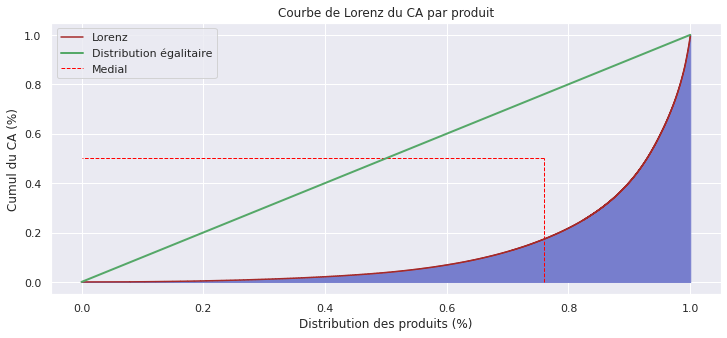

Coefficient de Gini= 0.74


In [274]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle ca
ca_produit = df_prod_ca['ca'].values
plt.figure(figsize=(12, 5))

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_ca_produit = np.cumsum(np.sort(ca_produit)) / ca_produit.sum()

plt.plot(np.linspace(0,1,len(lorenz_ca_produit)), lorenz_ca_produit, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ca_produit)) ,lorenz_ca_produit , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du CA par produit')
plt.xlabel("Distribution des produits (%)")
plt.ylabel("Cumul du CA (%)")
plt.legend(loc="best")

plt.savefig("lorenz_ca_produit.png")
plt.show()

#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_produit=(lorenz_ca_produit.sum()-(lorenz_ca_produit[-1]/2)-(lorenz_ca_produit[0]/2))/(len(lorenz_ca_produit))
S_produit=0.5-aire_produit
gini_produit=2*S_produit
print('Coefficient de Gini=', round(gini_produit,2))

Nous pouvons lire qu'il y a 20% de produits qui font 80% du CA total (Loi de Pareto (80/20)) donc on peut en deduire que ce sont des produits tres chers.

Le coefficient de Gini (0.74) étant plus proche de 1 que de 0, cela confirme que ces 20% de produits rapportent le plus.




Produits rapportant le plus grand CA

In [275]:
#liste des 4 produits rapportant le plus grand CA
df_top_produits=df_prod_ca.sort_values('ca', ascending=False).head(4)
df_top_produits

,id_prod,ca
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78


Produits rapportant le plus petit CA

In [276]:
#liste des 4 produits rapportant le plus petit CA
df_prod_ca.sort_values('ca', ascending=True).head(4)

,id_prod,ca
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1785,0_541,1.99


# **<font color='indianred'>Partie 6 : Tests statistiques</font>**

Je vais enlever les 4 clients les plus importants pour faire les tests.

In [277]:
df_clients_top

,client_id,ca
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153658.86
2724,c_3454,113667.90


In [278]:
df_clients_particuliers=df_transcl[(df_transcl['client_id']!='c_1609')&(df_transcl['client_id']!='c_4958')&(df_transcl['client_id']!='c_6714')&(df_transcl['client_id']!='c_3454')]
df_clients_particuliers.head()

,date,id_prod,price,categ,date_time,session_id,client_id,sex,birth,year,month,day,age,classe_age
0,2022-02-20,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,2022,2,20,31,30-40
1,2022-10-20,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,2022,10,20,31,30-40
2,2021-10-09,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,2021,10,9,31,30-40
3,2021-04-28,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,2021,4,28,31,30-40
4,2021-07-15,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,2021,7,15,31,30-40


## <a name="C15"><font color='LightSeaGreen'>Sexe client / Catégorie livres achetés </font></a>

Nous analysons ici 2 variables qualitatives donc nous utiliserons le test du Chi-deux.

Question : La categorie des livres achetés depend-elle du sexe du client?
Réponse: Oui/Non

- H0 : la catégorie ne dépend pas du sexe
- H1 : la catégorie dépend du sexe

In [279]:
#table pivot 
sexe_categorie = pd.pivot_table(df_clients_particuliers,index=['sex'],columns=['categ'],aggfunc='size')
sexe_categorie

categ,0,1,2
sex,,,
f,200904,111331,16980
m,186589,101017,15868


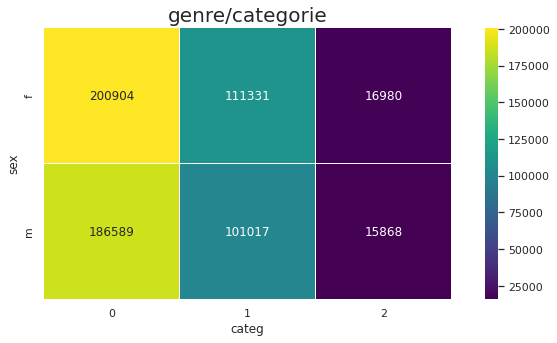

In [280]:
#carte de chaleur
plt.figure(figsize=(12, 5))
sns.heatmap(sexe_categorie,annot=True, fmt='g',square=True,cmap="viridis", linewidths=0.1)
plt.title('genre/categorie',fontsize=20)
plt.savefig("genre_categ.png")
plt.show()

In [281]:
#Calcul de la p-value avec le test du Chi-deux et avec un seuil de probabilité alpha=0.05
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
#Affichage des valeurs attendues (expected)
chi2, p, dof, expected = st.chi2_contingency(sexe_categorie.values)
print('Le khi-2 est de ', round(chi2,2))
print('La p-value est de ', p)
print('Le degré de liberté est de ', dof)
print('Valeurs attendues : ')
print(expected)

Le khi-2 est de  20.2
La p-value est de  4.1075985631484716e-05
Le degré de liberté est de  2
Valeurs attendues : 
[[201629.09106212 110493.69725094  17092.21168694]
 [185863.90893788 101854.30274906  15755.78831306]]


p-value < 0.05 alors on rejette H0, il y aurait une dépendance entre le sexe du client et la catégorie des produits achetés.

## <a name="C16"><font color='LightSeaGreen'> Age client / Catégorie livres achetés </font></a>

Je considere la variable age comme une variable qualitative en utilisant la variable classe_age, ainsi que la variable categorie. J'utilise le test du Chi2.

Question : La categorie des livres achetés depend-elle de l'âge du client? Réponse: Oui/Non

*   H0 : la catégorie ne dépend pas de l'âge
*   H1 : la catégorie dépend de l'âge



In [282]:
#table pivot 
classe_age_categorie = pd.pivot_table(df_clients_particuliers,index=['classe_age'],columns=['categ'],aggfunc='size')
classe_age_categorie

categ,0,1,2
classe_age,,,
18-30,15452,25863,27531
30-40,135226,43228,2990
40-50,153550,47958,769
50-60,43927,45316,718
60-70,24555,30858,539
70-80,9776,12572,178
80 +,5007,6553,123


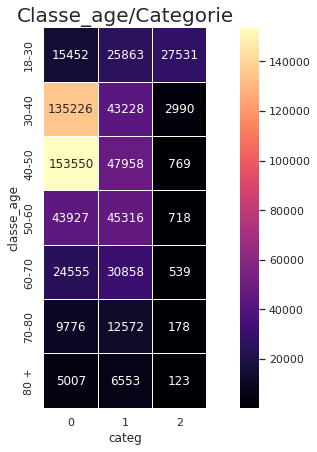

In [283]:
#carte de chaleur
plt.figure(figsize=(12,7))
sns.heatmap(classe_age_categorie,annot=True, fmt='g',square=True,cmap="magma", linewidths=0.1)
plt.title('Classe_age/Categorie',fontsize=20)
plt.savefig("classe_age_categ.png")
plt.show()

In [284]:
#Calcul de la p-value avec le test du Chi-deux et avec un seuil de probabilité alpha=0.05
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
#Affichage des valeurs attendues
chi2, p, dof, expected = st.chi2_contingency(classe_age_categorie.values)
print('Le khi-2 est de ', round(chi2,2))
print('La p-value est de ', p)
print('Le degré de liberté est de ', dof)
print('Valeurs attendues : ')
print(expected)

Le khi-2 est de  248301.08
La p-value est de  0.0
Le degré de liberté est de  12
Valeurs attendues : 
[[ 42165.01800727  23106.62965217   3574.35234057]
 [111126.12972882  60897.64562368   9420.2246475 ]
 [123885.38691363  67889.77901623  10501.83407014]
 [ 55096.98726072  30193.41007667   4670.6026626 ]
 [ 34268.03427276  18779.04514856   2904.92057867]
 [ 13796.14205083   7560.35121205   1169.50673712]
 [  7155.30176595   3921.13927064    606.55896341]]


p-value < 0.05 alors on rejette H0, il y aurait une dépendance entre la classe d'âge et la catégorie des produits achetés. 



## <a name="C17"><font color='LightSeaGreen'>Age / Catégorie livres achetés </font></a>

En considérant l'age comme une variable quantitative et la variable catégorie qualitative, nous utiliserons le test ANOVA.

Question : La categorie des livres achetés depend-elle de l'âge du client? Réponse: Oui/Non

*   H0 : la catégorie des livres achetés ne dépend pas de l'âge
*   H1 : la catégorie des livres achetés dépend de l'âge






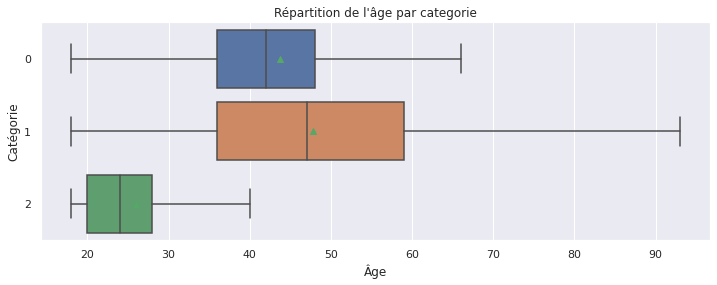

In [285]:
#Boxplot de l'age par catégorie avec Seaborn
plt.figure(figsize=(12,4))
sns.boxplot(x="age", y='categ', data=df_clients_particuliers, orient='h', showfliers=False, showmeans=True).set_title('Répartition de l\'âge par categorie')
plt.xlabel("Âge")
plt.ylabel("Catégorie")
plt.savefig("age_categ_anova.png")

In [286]:
#moyennes par catégorie 
moy=df_clients_particuliers.groupby('categ')['age'].mean()
moy

categ
0    43.794574
1    47.802913
2    25.965508
Name: age, dtype: float64

La moyenne d'âge de la catégorie 2 est  tres differente de celle des catégories 0 et 1 ce qui pourrait nous indiquer une dependance (toujours à vérifier).

In [287]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### <font color='purple'>Methode 1 : Ordinary Least Squares (OLS) model</font> 

In [288]:
# Ordinary Least Squares (OLS) model
model3=smf.ols('age~categ', data=df_clients_particuliers).fit()
sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
categ,8.612563e+05,1.0,4523.803934,0.0
Residual,1.204530e+08,632687.0,NaN,NaN


Normalité des résidus (Shapiro)
stats : 0.9671586155891418 
p-value : 0.0
H0 rejetée : La distribution semble ne pas être normale




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


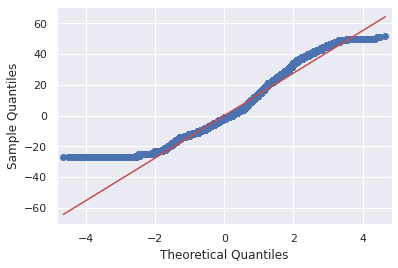

In [289]:
#Test de normalité le plus robuste : Test de Shapiro sur les résidus
from statsmodels.graphics.gofplots import qqplot
print('Normalité des résidus (Shapiro)')
print ('stats :', st.shapiro(model3.resid)[0],
    '\np-value :', st.shapiro(model3.resid)[1])
if p > 0.05:
    print('H0 acceptée : La distribution semble être normale')
else:
    print('H0 rejetée : La distribution semble ne pas être normale')
print('\n')
qqplot(model3.resid, line='s')
plt.savefig("age_categ_shapiro.png")
plt.show()

#### <font color='purple'>Methode 2 : One way ANOVA</font>  

In [290]:
#création des groupes selon les catégories 
df_age_cat0=df_clients_particuliers[df_clients_particuliers['categ']==0]['age']
df_age_cat1=df_clients_particuliers[df_clients_particuliers['categ']==1]['age']
df_age_cat2=df_clients_particuliers[df_clients_particuliers['categ']==2]['age']
#la fonction st.f_oneway prend en entrée les groupes de categories et retourne une 
#F-statistique et une p-value
statistic, pvalue= st.f_oneway(df_age_cat0, df_age_cat1, df_age_cat2)

In [291]:
print('statistic=%.2f, p=%.2f' % (statistic, pvalue))

statistic=40411.45, p=0.00


#### <font color='purple'>Test non paramétrique de Kruskal-Wallis</font>   

In [292]:
#Test non parametrique de Kruskal-Wallis
kstat, pval = st.kruskal(*[group["age"].values for name, group in df_clients_particuliers.groupby("categ")])
print('Test statistique de Kruskal-Wallis =', round(kstat,2))
print('p-value = ', pval)

Test statistique de Kruskal-Wallis = 72214.83
p-value =  0.0


Dans toutes les methodes, nous trouvons une P-value=0.0 < 0.05. Le test non parametrique de Kruskal le confirme donc il y aurait une dépendance entre l'âge et la catégorie des produits achetés.


## <a name="C18"><font color='LightSeaGreen'>Âge des clients / Montant total des achats </font></a>

Nous avons ici 2 variables quantitatives : Test paramétrique de Pearson.

Question : Le montant total des achats depend-il de l'âge du client? Réponse: Oui/Non


*   H0 : le montant total des achats ne dépend pas de l'âge
*   H1 : le montant total des achats dépend de l'âge




In [293]:
df_ca_age2=df_clients_particuliers[['age', 'price']].groupby(['age'], as_index=False).sum()
df_ca_age2=df_ca_age2.rename(columns={'price':'ca'})
df_ca_age2.head()

,age,ca
0,18,609013.69
1,19,178195.78
2,20,184207.32
3,21,178497.70
4,22,165027.96


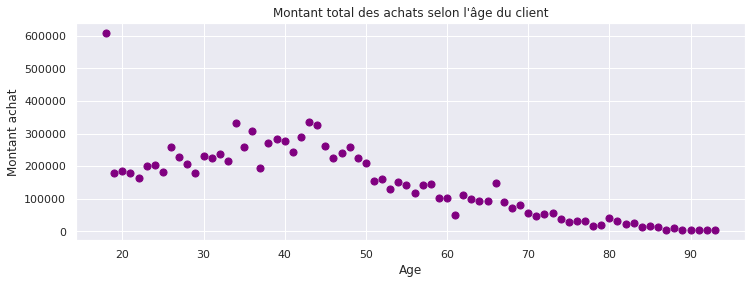

In [294]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_ca_age2, x="age", y="ca",fit_reg=False, scatter_kws={"color":"purple","alpha":1.0,"s":50})
plt.xlabel('Age')
plt.ylabel('Montant achat')
plt.title('Montant total des achats selon l\'âge du client')
plt.savefig("montant_achat_age_client.png")
plt.show()

#### <font color='purple'>Test de Pearson</font> 

In [295]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
from scipy.stats import pearsonr 
CorrAgeMontant = pd.DataFrame(pearsonr(df_ca_age2['age'], df_ca_age2['ca']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeMontant  

,resultat_test
Pearson_coeff,-8.306026e-01
p-value,1.696127e-20


Le coefficient de Pearson est negatif et proche de -1 donc il y a une forte correlation entre l'age des clients et le montant de leurs achats et p-value < 0.05 donc H0 est rejetée.

#### <font color='purple'>Test non paramétrique de Spearman</font>  

In [296]:
#Test de Spearman
st.spearmanr(df_ca_age2['age'], df_ca_age2['ca'])

SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)

Spearman etant plus robuste, confirme la corrélation entre le montant des achats et l'âge des clients par une p-value<0.05 et r tres proche de -1.

## <a name="C19"><font color='LightSeaGreen'> Âge des clients / Fréquence d’achat </font></a>

Les 2 variables sont quantitatives : Test de corrélation de Pearson

Question : La frequence d'achats depend-elle de l'âge du client? Réponse: Oui/Non

*   H0 : la frequence d'achats ne dépend pas de l'âge du client
*   H1 : la frequence d'achats dépend de l'âge du client




In [297]:
#Nombre d'achats par âge sur la période d'analyse
df_frequence_age2=df_clients_particuliers[['age', 'price']].groupby('age', as_index=False).count()
df_frequence_age2=df_frequence_age2.rename(columns={'price':'effectif'})
df_frequence_age2.head(3)

,age,effectif
0,18,15149
1,19,4371
2,20,4587


In [298]:
#Calcul de la fréquence d'achats par âge 
df_frequence_age2['frequence']=df_frequence_age2['effectif']/30
df_frequence_age2.head(3)

,age,effectif,frequence
0,18,15149,504.966667
1,19,4371,145.700000
2,20,4587,152.900000


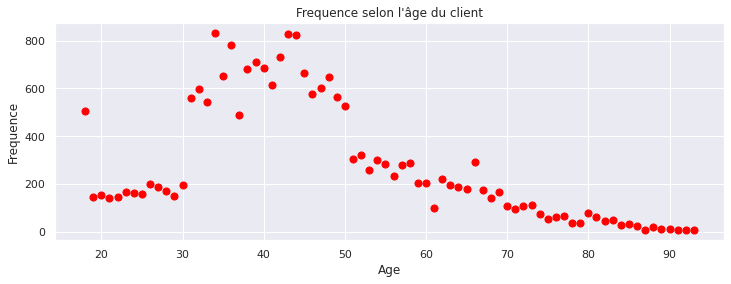

In [299]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_frequence_age2, x="age", y="frequence",fit_reg=False, scatter_kws={"color":"red","alpha":1.0,"s":50})
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Frequence selon l\'âge du client')
plt.savefig("frequence_age_client.png")
plt.show()

#### <font color='purple'>Test de Pearson</font> 

In [300]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
CorrAgeFrequence = pd.DataFrame(pearsonr(df_frequence_age2['age'], df_frequence_age2['frequence']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeFrequence

,resultat_test
Pearson_coeff,-5.744026e-01
p-value,5.780324e-08


Corrélation negative et p_value<0.05, H0 rejetée.

#### <font color='purple'>Test non paramétrique de Spearman</font>  

In [301]:
#Test de Spearman
st.spearmanr(df_frequence_age2['age'], df_frequence_age2['frequence'])

SpearmanrResult(correlation=-0.6738482570061518, pvalue=2.5391854434818517e-11)

Spearman est plus robuste et confirme par une p-value<0.05 la corrélation entre la frequence d'achats et l'âge du client.

## <a name="C20"><font color='LightSeaGreen'> Âge des clients / Panier moyen </font></a>

Les 2 variables sont quantitatives : Test de corrélation de Pearson

Question : Le panier moyen depend-il de l'âge du client? Réponse: Oui/Non

*   H0 : le panier moyen ne dépend pas de l'âge du client
*   H1 : le panier moyen dépend de l'âge du client





In [302]:
df_age_panier_moyen=df_clients_particuliers[['age', 'price']].groupby(['age'], as_index=False).agg({'price':['count', 'sum']})
df_age_panier_moyen.columns=['age', 'nb_achats', 'ca']
df_age_panier_moyen['panier_moyen']=(df_age_panier_moyen['ca'])/(df_age_panier_moyen['nb_achats'])
df_age_panier_moyen.head()

,age,nb_achats,ca,panier_moyen
0,18,15149,609013.69,40.201577
1,19,4371,178195.78,40.767737
2,20,4587,184207.32,40.158561
3,21,4252,178497.70,41.979704
4,22,4415,165027.96,37.378926


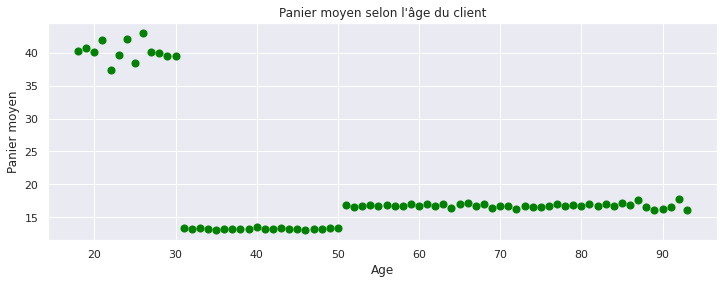

In [303]:
plt.figure(figsize=(12,4))
sns.regplot(data=df_age_panier_moyen, x="age", y="panier_moyen",fit_reg=False, scatter_kws={"color":"green","alpha":1.0,"s":50})
plt.xlabel('Age')
plt.ylabel('Panier moyen')
plt.title('Panier moyen selon l\'âge du client')
plt.savefig("panier_moyen_age_client.png")
plt.show()

#### <font color='purple'>Test de Pearson</font> 

In [304]:
#Test  de Pearson : calcul du coefficient de corrélation de Pearson et de la p-value
CorrAgePanierMoyen = pd.DataFrame(pearsonr(df_age_panier_moyen['age'], df_age_panier_moyen['panier_moyen']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgePanierMoyen 

,resultat_test
Pearson_coeff,-5.469815e-01
p-value,3.181401e-07


Correlation negative (-0.54) et p_value<0.05 





#### <font color='purple'>Test non paramétrique de Spearman</font>  

In [305]:
#Test de Spearman
st.spearmanr(df_age_panier_moyen['age'], df_age_panier_moyen['panier_moyen'])

SpearmanrResult(correlation=-0.08464798359535201, pvalue=0.4672135700038008)

p-value>0.05 et r=-0.08 (proche de 0). Le test de Spearman etant plus robuste que celui de Pearson, il y a peut-être une indépendance entre le panier moyen et l'âge. On ne rejette pas H0.